# Image Processing Lab 1
Dr. Amr Amin  
Ahmed Alqassas  
Autumn 2024-25  

## Digital Images
A digital image is composed of a finite number of elements, each of which has a particular location and value,
called Pixels.

## Digital Image Formation
In digital world, representing a function $f(x) = y$ involves important steps to ensure it can be processed by computers. You simply need to discretize the inputs, and then define a finite set of possible outputs.

An image can be thought of as a function in pixels' location $I(u, v) = P$. To be able to process it on a computer, you need to select discrete $u, v$ points and set a finite levels of possible $P$ values.  

![Array of Sensors](./figs/sensors.png)  

The creation of digital images is done over 3 steps:
1.   **Acquisition** converts the light into an electrical signals using an array of sensors.
2.   **Sampling** involves selecting discrete points from the continuous signal.
3.   **Quantization** assigns a finite set of values to the selected pixels.





## **Hands-on** Import and show an image

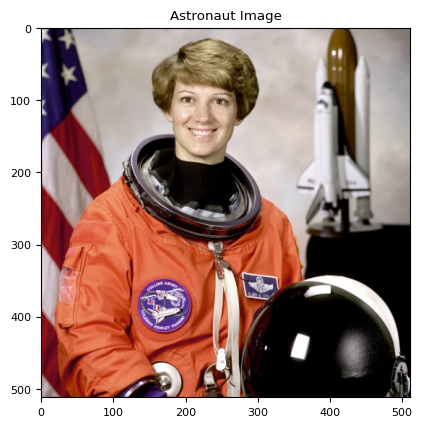

In [2]:
from skimage import data
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 8

# Load a built-in image from skimage
image = data.astronaut()  # Load the astronaut image (RGB)

# Display the image using matplotlib
plt.imshow(image)

plt.title('Astronaut Image')
plt.show()

## **Hands-on** Convert RGB images to Grayscale

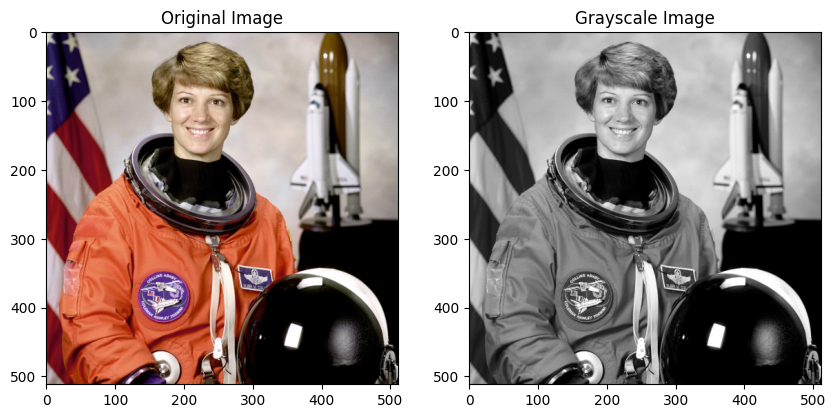

In [9]:
from skimage import color

# Load a built-in image from skimage (astronaut image in RGB)
image = data.astronaut()

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Display the original and grayscale images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original RGB image
axes[0].imshow(image)
axes[0].set_title("Original Image")

# Display the grayscale image
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title("Grayscale Image")
plt.show()

## **Hands-on** Image Shape and Data Type


In [10]:
# Show the shape and data type of the grayscale image
print(f"Grayscale image size (height, width): {gray_image.shape}")
print(f"Grayscale image Data type: {gray_image.dtype}")

Grayscale image size (height, width): (512, 512)
Grayscale image Data type: float64


In [4]:
# Show the shape and data type of the grayscale image
print(f"Original image size (height, width): {image.shape}")
print(f"Original image Data type: {image.dtype}")

Original image size (height, width): (512, 512, 3)
Original image Data type: uint8


## Example 1
Determine the number of bytes necessary to store an uncompressed RGB color image of size 384 × 512 pixelsusing 8, 12,16, and 64 bits per color channel.

| Bit-depth | Rows     | Columns  | Channels | Bytes per element | Size in bytes|
|-----------|----------|----------|----------|-------------------|--------------|
| 8         | 384      | 512      |3         |8/8 = 1            |589,824       |
| 12        | 384      | 512      |3         |12/8 = 1.5         |884,736       |
| 16        | 384      | 512      |3         |16/8 = 2           |1,179,648     |
| 64        | 384      | 512      |3         |64/8=8             |4,718,592     |

## Example 2
An uncompressed grayscale image of size 256 x 256 pixels is stored using a bit-depth of 16 bits. How many bytes are required to store the image?  

| Bit-depth | Rows     | Columns  | Channels | Bytes per element | Size in bytes|
|-----------|----------|----------|----------|-------------------|--------------|
| 16        | 256      | 256      |1         |16/8 = 2           |131,072       |


## **Hands-on** Split RGB image into its 3 channels


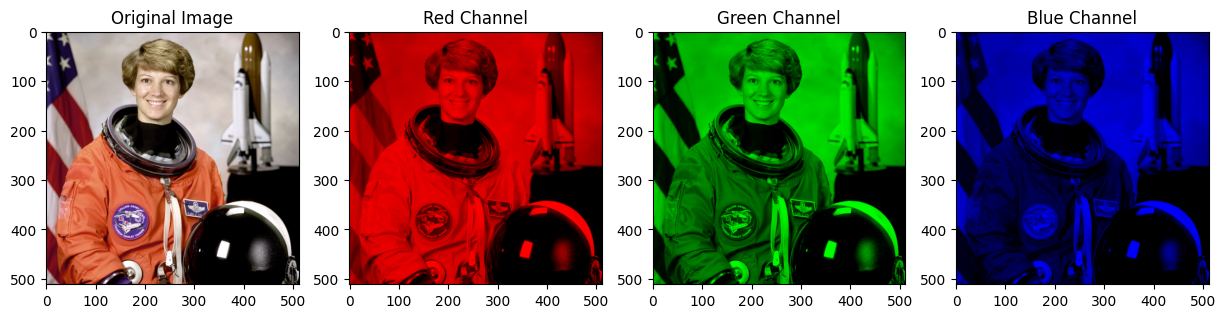

In [5]:
import numpy as np
# Load the built-in astronaut image
image = data.astronaut()

# Split the image into R, G, B channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]
allBlack = np.zeros_like(red_channel)

just_red = np.stack((red_channel, allBlack, allBlack), axis=2) # pay attention to axis = 2
just_green = np.stack((allBlack, green_channel, allBlack), axis=2)
just_blue = np.stack((allBlack, allBlack, blue_channel), axis=2)


# Create a plot to display the original and the channels
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title("Original Image")

# Red channel
axes[1].imshow(just_red)
axes[1].set_title("Red Channel")

# Green channel
axes[2].imshow(just_green)
axes[2].set_title("Green Channel")

# Blue channel
axes[3].imshow(just_blue)
axes[3].set_title("Blue Channel")
plt.show()

## **Hands-on** CMY channels


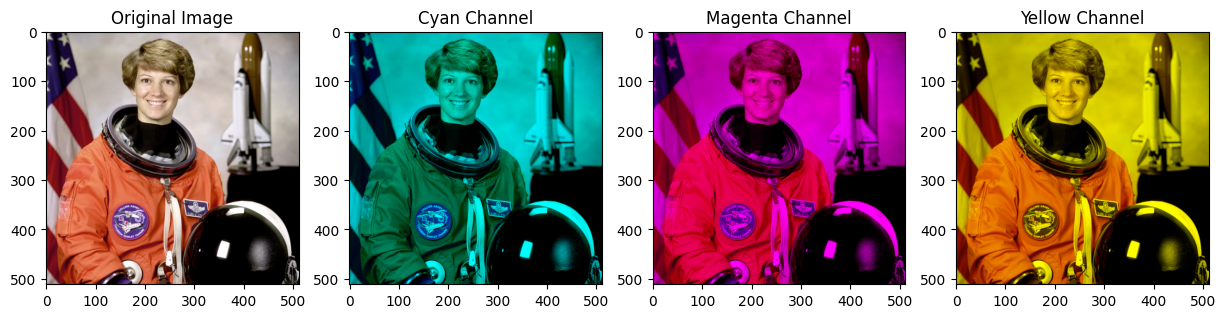

In [6]:
gb_image = np.stack((allBlack, green_channel, blue_channel), axis=2)
rb_image = np.stack((red_channel, allBlack, blue_channel), axis=2)
rg_image = np.stack((red_channel, green_channel, allBlack), axis=2)

# Create a plot to display the original and the channels
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title("Original Image")

# Red channel
axes[1].imshow(gb_image)
axes[1].set_title("Cyan Channel")

# Green channel
axes[2].imshow(rb_image)
axes[2].set_title("Magenta Channel")

# Blue channel
axes[3].imshow(rg_image)
axes[3].set_title("Yellow Channel")
plt.show()

> **Note**: Another way to do this is just simply setting the channel you want to remove in the original image to zeros

# **Hands-on** Modifying Pixels Values

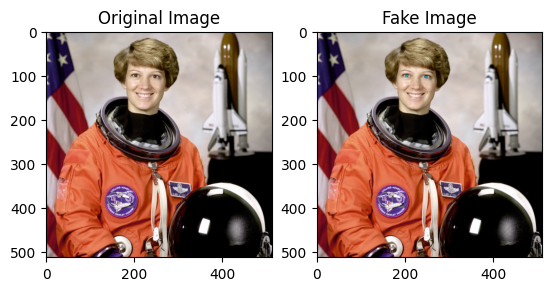

In [7]:
org_im = data.astronaut()
fk_im = org_im.copy()

fk_im[99:104, 200:206, 0] = 20
fk_im[99:104, 200:206, 1] = 150
fk_im[99:104, 200:206, 2] = 180

fk_im[102:107, 244:250, 0] = 20
fk_im[102:107, 244:250, 1] = 150
fk_im[102:107, 244:250, 2] = 180


# Create a plot to display the original and the channels
fig, axes = plt.subplots(1, 2)

# Original image
axes[0].imshow(org_im)
axes[0].set_title("Original Image")

# Fake image
axes[1].imshow(fk_im)
axes[1].set_title("Fake Image")
plt.show()